### 프로젝트5-1 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자 

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### (1) 데이터 가져오기

In [204]:
from sklearn.datasets import load_diabetes 

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


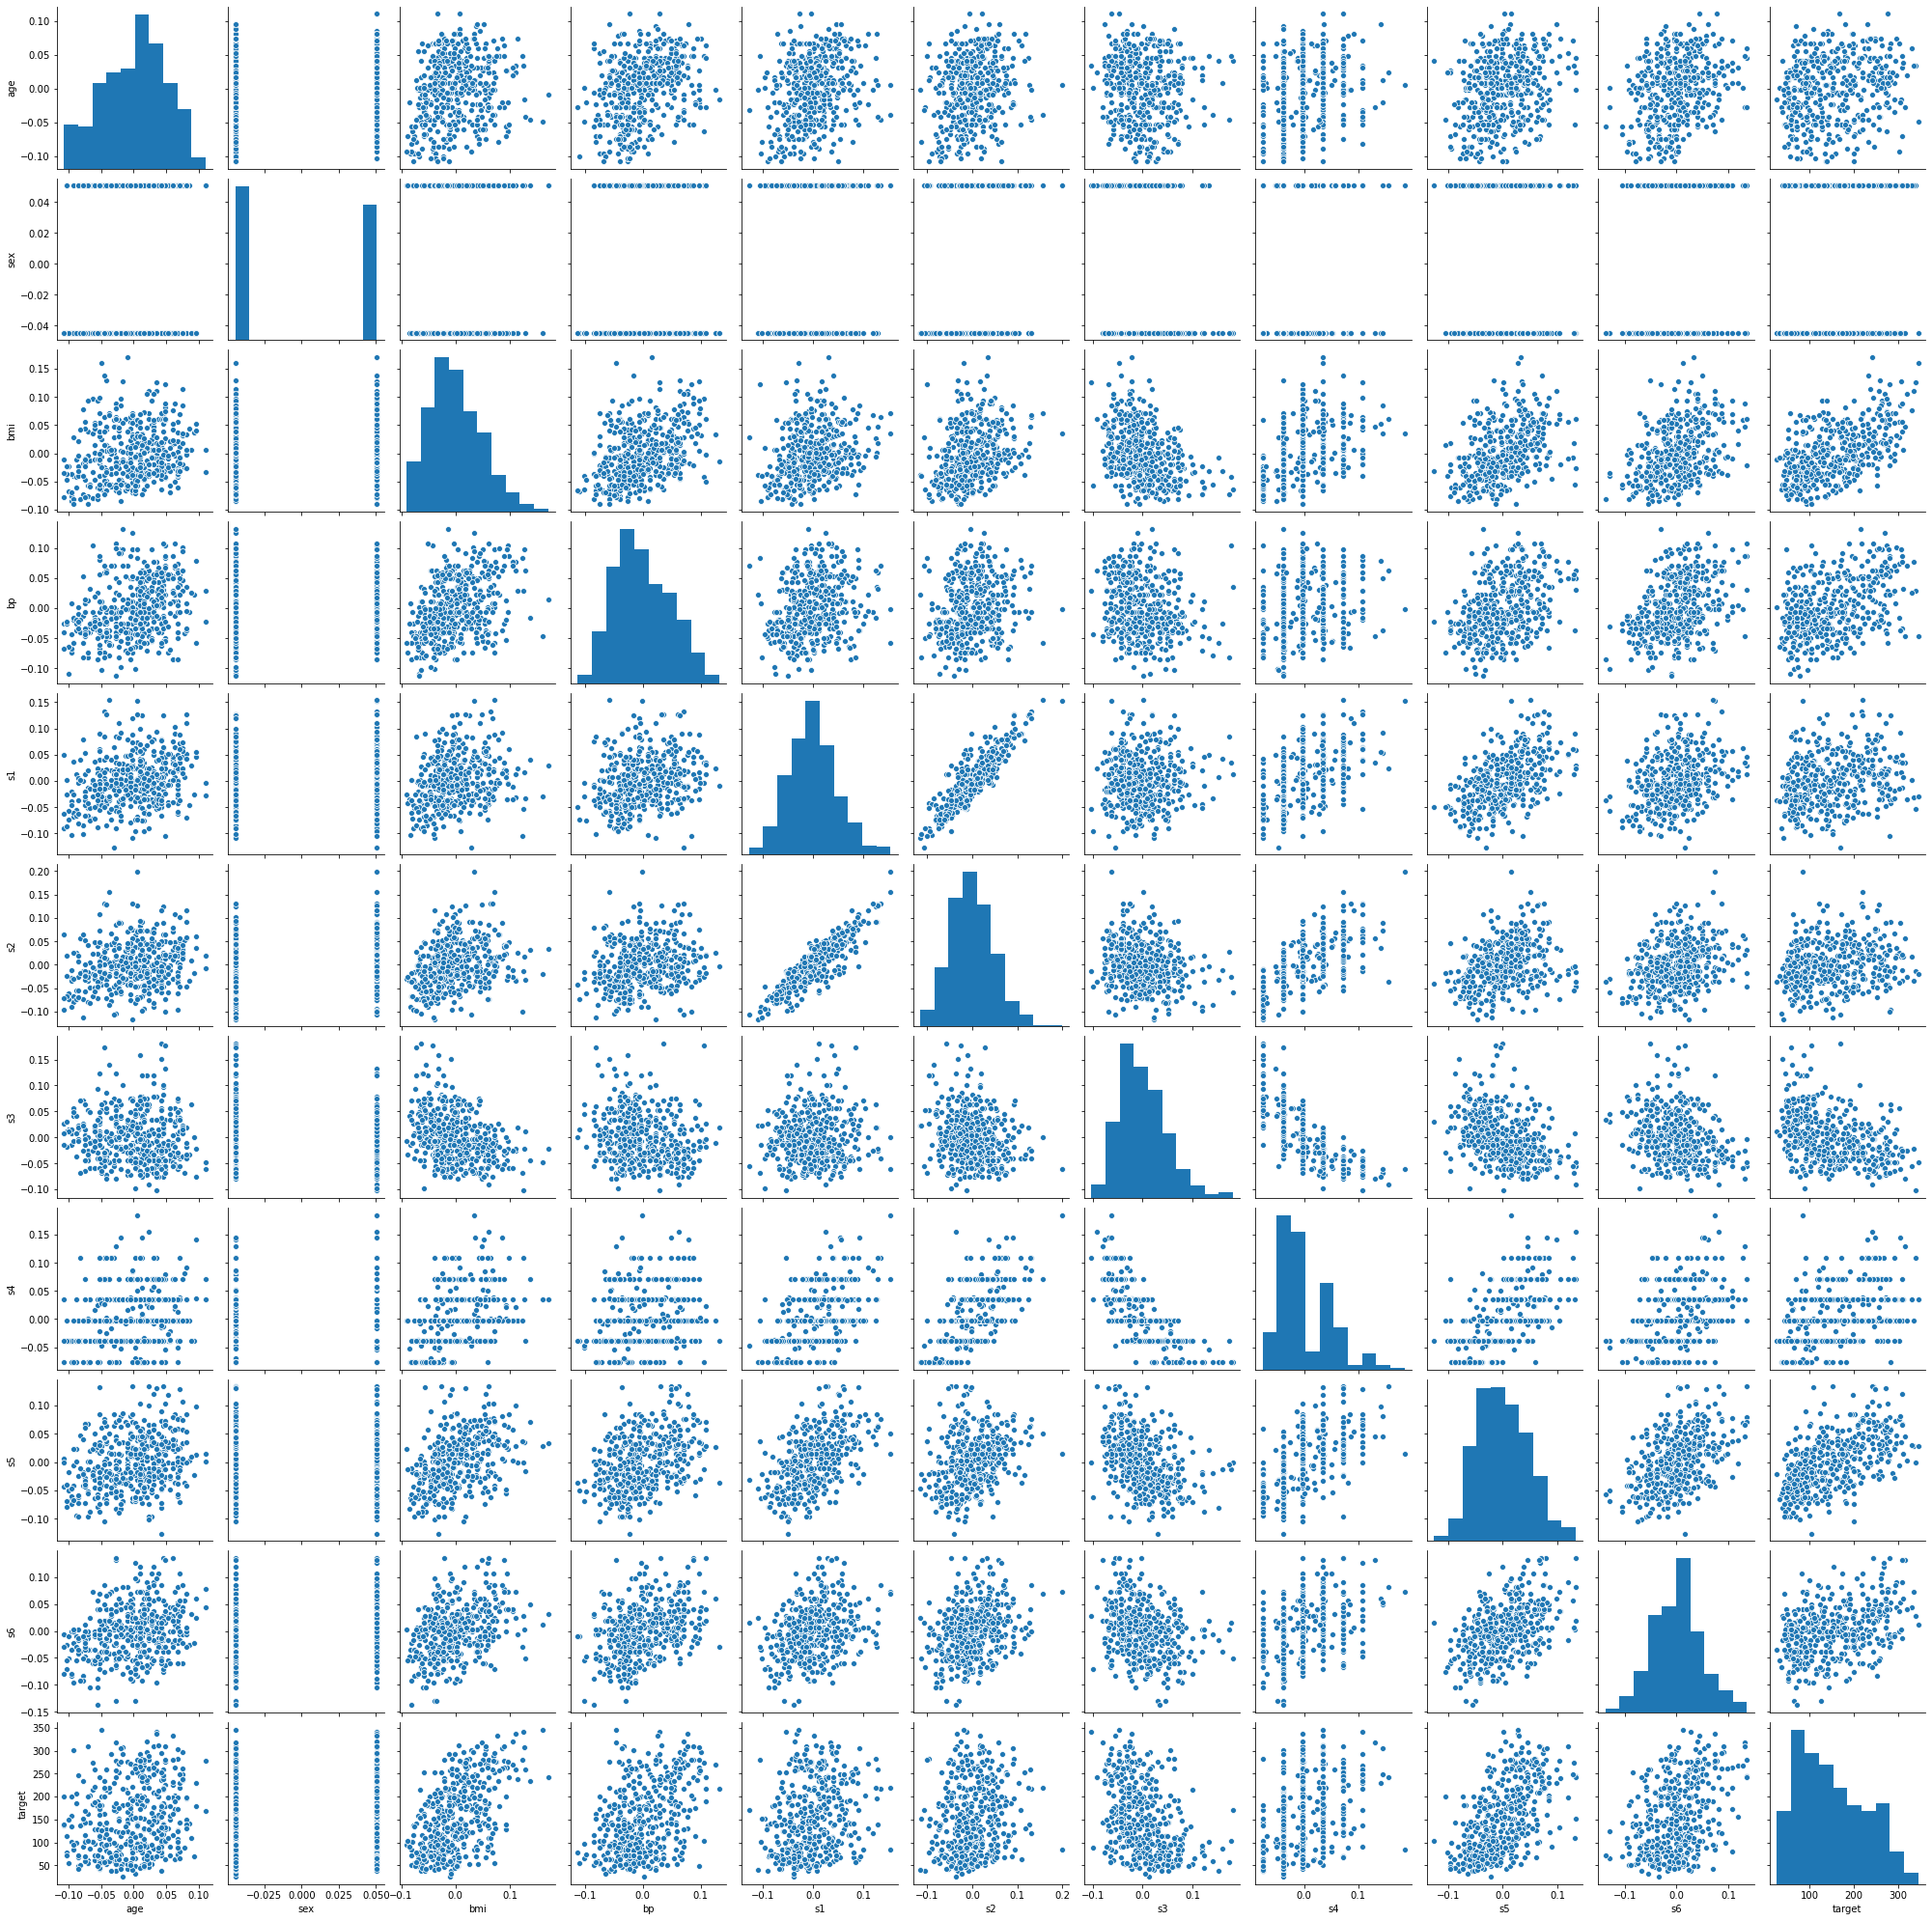

In [205]:
sns.pairplot(df)
plt.show()

In [206]:
df_X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
df_y = df['target'].values

In [207]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [208]:
W = np.random.rand(10)
b = np.random.rand()

#### (2) 모델 준비하기

In [209]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i]*W[i]
    predictions += b
    return predictions

#### (3) 손실함수 정의하기
- MSE

In [210]:
def MSE(y_pred, y):
    mse = ((y- y_pred)**2).mean()
    return mse    
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y) 
    return L

In [211]:
def gradient(X, W, b, y):
    N = len(X)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2*(y_pred -y).mean()
    return dW, db

In [212]:
LEARNING_RATE = 0.1

In [213]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('iteration %d : Loss %0.4f' %(i, L))

iteration 10 : Loss 6258.8630
iteration 20 : Loss 5915.9427
iteration 30 : Loss 5839.1178
iteration 40 : Loss 5767.6201
iteration 50 : Loss 5698.3665
iteration 60 : Loss 5631.2475
iteration 70 : Loss 5566.1904
iteration 80 : Loss 5503.1254
iteration 90 : Loss 5441.9852
iteration 100 : Loss 5382.7047
iteration 110 : Loss 5325.2213
iteration 120 : Loss 5269.4744
iteration 130 : Loss 5215.4055
iteration 140 : Loss 5162.9584
iteration 150 : Loss 5112.0785
iteration 160 : Loss 5062.7133
iteration 170 : Loss 5014.8122
iteration 180 : Loss 4968.3262
iteration 190 : Loss 4923.2081
iteration 200 : Loss 4879.4123
iteration 210 : Loss 4836.8947
iteration 220 : Loss 4795.6129
iteration 230 : Loss 4755.5260
iteration 240 : Loss 4716.5942
iteration 250 : Loss 4678.7795
iteration 260 : Loss 4642.0449
iteration 270 : Loss 4606.3548
iteration 280 : Loss 4571.6749
iteration 290 : Loss 4537.9719
iteration 300 : Loss 4505.2139
iteration 310 : Loss 4473.3700
iteration 320 : Loss 4442.4101
iteration 330 : L

iteration 4650 : Loss 2919.6861
iteration 4660 : Loss 2919.5236
iteration 4670 : Loss 2919.3625
iteration 4680 : Loss 2919.2027
iteration 4690 : Loss 2919.0442
iteration 4700 : Loss 2918.8870
iteration 4710 : Loss 2918.7311
iteration 4720 : Loss 2918.5765
iteration 4730 : Loss 2918.4231
iteration 4740 : Loss 2918.2709
iteration 4750 : Loss 2918.1200
iteration 4760 : Loss 2917.9704
iteration 4770 : Loss 2917.8219
iteration 4780 : Loss 2917.6746
iteration 4790 : Loss 2917.5286
iteration 4800 : Loss 2917.3837
iteration 4810 : Loss 2917.2400
iteration 4820 : Loss 2917.0975
iteration 4830 : Loss 2916.9561
iteration 4840 : Loss 2916.8158
iteration 4850 : Loss 2916.6767
iteration 4860 : Loss 2916.5387
iteration 4870 : Loss 2916.4018
iteration 4880 : Loss 2916.2661
iteration 4890 : Loss 2916.1314
iteration 4900 : Loss 2915.9978
iteration 4910 : Loss 2915.8652
iteration 4920 : Loss 2915.7338
iteration 4930 : Loss 2915.6033
iteration 4940 : Loss 2915.4740
iteration 4950 : Loss 2915.3456
iteratio

iteration 7220 : Loss 2901.5072
iteration 7230 : Loss 2901.4824
iteration 7240 : Loss 2901.4579
iteration 7250 : Loss 2901.4335
iteration 7260 : Loss 2901.4092
iteration 7270 : Loss 2901.3851
iteration 7280 : Loss 2901.3611
iteration 7290 : Loss 2901.3373
iteration 7300 : Loss 2901.3136
iteration 7310 : Loss 2901.2901
iteration 7320 : Loss 2901.2668
iteration 7330 : Loss 2901.2435
iteration 7340 : Loss 2901.2205
iteration 7350 : Loss 2901.1975
iteration 7360 : Loss 2901.1748
iteration 7370 : Loss 2901.1521
iteration 7380 : Loss 2901.1296
iteration 7390 : Loss 2901.1072
iteration 7400 : Loss 2901.0850
iteration 7410 : Loss 2901.0629
iteration 7420 : Loss 2901.0409
iteration 7430 : Loss 2901.0191
iteration 7440 : Loss 2900.9974
iteration 7450 : Loss 2900.9759
iteration 7460 : Loss 2900.9545
iteration 7470 : Loss 2900.9332
iteration 7480 : Loss 2900.9120
iteration 7490 : Loss 2900.8910
iteration 7500 : Loss 2900.8701
iteration 7510 : Loss 2900.8493
iteration 7520 : Loss 2900.8286
iteratio

In [214]:
prediction = model(X_test, W, b)

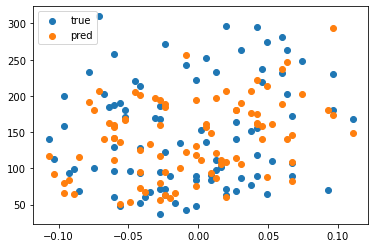

In [215]:
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.legend()
plt.show()

In [216]:
df_X = df[['age', 'sex','bmi', 'bp', 's1', 's4', 's5']].values
df_y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [217]:
W = np.random.rand(7)
b = np.random.rand()

In [218]:
LEARNING_RATE = 0.1
losses = []

for i in range(1, 50001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('iteration %d : Loss %0.4f' %(i, L))

iteration 10 : Loss 6274.9580
iteration 20 : Loss 5948.8557
iteration 30 : Loss 5887.3688
iteration 40 : Loss 5830.2842
iteration 50 : Loss 5774.5680
iteration 60 : Loss 5720.1522
iteration 70 : Loss 5667.0040
iteration 80 : Loss 5615.0916
iteration 90 : Loss 5564.3841
iteration 100 : Loss 5514.8513
iteration 110 : Loss 5466.4641
iteration 120 : Loss 5419.1937
iteration 130 : Loss 5373.0123
iteration 140 : Loss 5327.8928
iteration 150 : Loss 5283.8087
iteration 160 : Loss 5240.7343
iteration 170 : Loss 5198.6443
iteration 180 : Loss 5157.5144
iteration 190 : Loss 5117.3206
iteration 200 : Loss 5078.0398
iteration 210 : Loss 5039.6493
iteration 220 : Loss 5002.1270
iteration 230 : Loss 4965.4514
iteration 240 : Loss 4929.6015
iteration 250 : Loss 4894.5569
iteration 260 : Loss 4860.2978
iteration 270 : Loss 4826.8046
iteration 280 : Loss 4794.0585
iteration 290 : Loss 4762.0411
iteration 300 : Loss 4730.7344
iteration 310 : Loss 4700.1209
iteration 320 : Loss 4670.1836
iteration 330 : L

iteration 4980 : Loss 2946.4828
iteration 4990 : Loss 2946.2158
iteration 5000 : Loss 2945.9504
iteration 5010 : Loss 2945.6865
iteration 5020 : Loss 2945.4242
iteration 5030 : Loss 2945.1633
iteration 5040 : Loss 2944.9040
iteration 5050 : Loss 2944.6461
iteration 5060 : Loss 2944.3898
iteration 5070 : Loss 2944.1348
iteration 5080 : Loss 2943.8814
iteration 5090 : Loss 2943.6294
iteration 5100 : Loss 2943.3788
iteration 5110 : Loss 2943.1297
iteration 5120 : Loss 2942.8820
iteration 5130 : Loss 2942.6357
iteration 5140 : Loss 2942.3908
iteration 5150 : Loss 2942.1474
iteration 5160 : Loss 2941.9053
iteration 5170 : Loss 2941.6645
iteration 5180 : Loss 2941.4252
iteration 5190 : Loss 2941.1872
iteration 5200 : Loss 2940.9505
iteration 5210 : Loss 2940.7152
iteration 5220 : Loss 2940.4812
iteration 5230 : Loss 2940.2486
iteration 5240 : Loss 2940.0173
iteration 5250 : Loss 2939.7872
iteration 5260 : Loss 2939.5585
iteration 5270 : Loss 2939.3311
iteration 5280 : Loss 2939.1049
iteratio

iteration 8140 : Loss 2905.8510
iteration 8150 : Loss 2905.7977
iteration 8160 : Loss 2905.7447
iteration 8170 : Loss 2905.6920
iteration 8180 : Loss 2905.6395
iteration 8190 : Loss 2905.5872
iteration 8200 : Loss 2905.5351
iteration 8210 : Loss 2905.4833
iteration 8220 : Loss 2905.4317
iteration 8230 : Loss 2905.3804
iteration 8240 : Loss 2905.3293
iteration 8250 : Loss 2905.2784
iteration 8260 : Loss 2905.2277
iteration 8270 : Loss 2905.1772
iteration 8280 : Loss 2905.1270
iteration 8290 : Loss 2905.0770
iteration 8300 : Loss 2905.0272
iteration 8310 : Loss 2904.9777
iteration 8320 : Loss 2904.9284
iteration 8330 : Loss 2904.8792
iteration 8340 : Loss 2904.8303
iteration 8350 : Loss 2904.7816
iteration 8360 : Loss 2904.7332
iteration 8370 : Loss 2904.6849
iteration 8380 : Loss 2904.6369
iteration 8390 : Loss 2904.5890
iteration 8400 : Loss 2904.5414
iteration 8410 : Loss 2904.4940
iteration 8420 : Loss 2904.4468
iteration 8430 : Loss 2904.3998
iteration 8440 : Loss 2904.3530
iteratio

iteration 11340 : Loss 2896.4911
iteration 11350 : Loss 2896.4766
iteration 11360 : Loss 2896.4622
iteration 11370 : Loss 2896.4478
iteration 11380 : Loss 2896.4334
iteration 11390 : Loss 2896.4191
iteration 11400 : Loss 2896.4049
iteration 11410 : Loss 2896.3907
iteration 11420 : Loss 2896.3766
iteration 11430 : Loss 2896.3625
iteration 11440 : Loss 2896.3485
iteration 11450 : Loss 2896.3345
iteration 11460 : Loss 2896.3206
iteration 11470 : Loss 2896.3067
iteration 11480 : Loss 2896.2929
iteration 11490 : Loss 2896.2791
iteration 11500 : Loss 2896.2654
iteration 11510 : Loss 2896.2517
iteration 11520 : Loss 2896.2381
iteration 11530 : Loss 2896.2245
iteration 11540 : Loss 2896.2110
iteration 11550 : Loss 2896.1976
iteration 11560 : Loss 2896.1841
iteration 11570 : Loss 2896.1708
iteration 11580 : Loss 2896.1575
iteration 11590 : Loss 2896.1442
iteration 11600 : Loss 2896.1310
iteration 11610 : Loss 2896.1178
iteration 11620 : Loss 2896.1047
iteration 11630 : Loss 2896.0916
iteration 

iteration 14540 : Loss 2893.7262
iteration 14550 : Loss 2893.7215
iteration 14560 : Loss 2893.7168
iteration 14570 : Loss 2893.7121
iteration 14580 : Loss 2893.7074
iteration 14590 : Loss 2893.7028
iteration 14600 : Loss 2893.6982
iteration 14610 : Loss 2893.6935
iteration 14620 : Loss 2893.6889
iteration 14630 : Loss 2893.6843
iteration 14640 : Loss 2893.6798
iteration 14650 : Loss 2893.6752
iteration 14660 : Loss 2893.6707
iteration 14670 : Loss 2893.6661
iteration 14680 : Loss 2893.6616
iteration 14690 : Loss 2893.6571
iteration 14700 : Loss 2893.6526
iteration 14710 : Loss 2893.6482
iteration 14720 : Loss 2893.6437
iteration 14730 : Loss 2893.6393
iteration 14740 : Loss 2893.6348
iteration 14750 : Loss 2893.6304
iteration 14760 : Loss 2893.6260
iteration 14770 : Loss 2893.6217
iteration 14780 : Loss 2893.6173
iteration 14790 : Loss 2893.6129
iteration 14800 : Loss 2893.6086
iteration 14810 : Loss 2893.6043
iteration 14820 : Loss 2893.6000
iteration 14830 : Loss 2893.5957
iteration 

iteration 17040 : Loss 2892.9210
iteration 17050 : Loss 2892.9190
iteration 17060 : Loss 2892.9169
iteration 17070 : Loss 2892.9148
iteration 17080 : Loss 2892.9127
iteration 17090 : Loss 2892.9107
iteration 17100 : Loss 2892.9086
iteration 17110 : Loss 2892.9065
iteration 17120 : Loss 2892.9045
iteration 17130 : Loss 2892.9025
iteration 17140 : Loss 2892.9004
iteration 17150 : Loss 2892.8984
iteration 17160 : Loss 2892.8964
iteration 17170 : Loss 2892.8944
iteration 17180 : Loss 2892.8924
iteration 17190 : Loss 2892.8904
iteration 17200 : Loss 2892.8884
iteration 17210 : Loss 2892.8864
iteration 17220 : Loss 2892.8844
iteration 17230 : Loss 2892.8824
iteration 17240 : Loss 2892.8805
iteration 17250 : Loss 2892.8785
iteration 17260 : Loss 2892.8765
iteration 17270 : Loss 2892.8746
iteration 17280 : Loss 2892.8726
iteration 17290 : Loss 2892.8707
iteration 17300 : Loss 2892.8688
iteration 17310 : Loss 2892.8668
iteration 17320 : Loss 2892.8649
iteration 17330 : Loss 2892.8630
iteration 

iteration 19830 : Loss 2892.5311
iteration 19840 : Loss 2892.5303
iteration 19850 : Loss 2892.5294
iteration 19860 : Loss 2892.5285
iteration 19870 : Loss 2892.5276
iteration 19880 : Loss 2892.5268
iteration 19890 : Loss 2892.5259
iteration 19900 : Loss 2892.5250
iteration 19910 : Loss 2892.5242
iteration 19920 : Loss 2892.5233
iteration 19930 : Loss 2892.5225
iteration 19940 : Loss 2892.5216
iteration 19950 : Loss 2892.5207
iteration 19960 : Loss 2892.5199
iteration 19970 : Loss 2892.5190
iteration 19980 : Loss 2892.5182
iteration 19990 : Loss 2892.5174
iteration 20000 : Loss 2892.5165
iteration 20010 : Loss 2892.5157
iteration 20020 : Loss 2892.5149
iteration 20030 : Loss 2892.5140
iteration 20040 : Loss 2892.5132
iteration 20050 : Loss 2892.5124
iteration 20060 : Loss 2892.5115
iteration 20070 : Loss 2892.5107
iteration 20080 : Loss 2892.5099
iteration 20090 : Loss 2892.5091
iteration 20100 : Loss 2892.5083
iteration 20110 : Loss 2892.5075
iteration 20120 : Loss 2892.5067
iteration 

iteration 22550 : Loss 2892.3671
iteration 22560 : Loss 2892.3667
iteration 22570 : Loss 2892.3663
iteration 22580 : Loss 2892.3659
iteration 22590 : Loss 2892.3656
iteration 22600 : Loss 2892.3652
iteration 22610 : Loss 2892.3648
iteration 22620 : Loss 2892.3644
iteration 22630 : Loss 2892.3640
iteration 22640 : Loss 2892.3636
iteration 22650 : Loss 2892.3633
iteration 22660 : Loss 2892.3629
iteration 22670 : Loss 2892.3625
iteration 22680 : Loss 2892.3621
iteration 22690 : Loss 2892.3617
iteration 22700 : Loss 2892.3614
iteration 22710 : Loss 2892.3610
iteration 22720 : Loss 2892.3606
iteration 22730 : Loss 2892.3602
iteration 22740 : Loss 2892.3599
iteration 22750 : Loss 2892.3595
iteration 22760 : Loss 2892.3591
iteration 22770 : Loss 2892.3588
iteration 22780 : Loss 2892.3584
iteration 22790 : Loss 2892.3580
iteration 22800 : Loss 2892.3577
iteration 22810 : Loss 2892.3573
iteration 22820 : Loss 2892.3569
iteration 22830 : Loss 2892.3566
iteration 22840 : Loss 2892.3562
iteration 

iteration 25040 : Loss 2892.2976
iteration 25050 : Loss 2892.2974
iteration 25060 : Loss 2892.2972
iteration 25070 : Loss 2892.2970
iteration 25080 : Loss 2892.2968
iteration 25090 : Loss 2892.2967
iteration 25100 : Loss 2892.2965
iteration 25110 : Loss 2892.2963
iteration 25120 : Loss 2892.2961
iteration 25130 : Loss 2892.2959
iteration 25140 : Loss 2892.2957
iteration 25150 : Loss 2892.2955
iteration 25160 : Loss 2892.2953
iteration 25170 : Loss 2892.2952
iteration 25180 : Loss 2892.2950
iteration 25190 : Loss 2892.2948
iteration 25200 : Loss 2892.2946
iteration 25210 : Loss 2892.2944
iteration 25220 : Loss 2892.2943
iteration 25230 : Loss 2892.2941
iteration 25240 : Loss 2892.2939
iteration 25250 : Loss 2892.2937
iteration 25260 : Loss 2892.2935
iteration 25270 : Loss 2892.2934
iteration 25280 : Loss 2892.2932
iteration 25290 : Loss 2892.2930
iteration 25300 : Loss 2892.2928
iteration 25310 : Loss 2892.2926
iteration 25320 : Loss 2892.2925
iteration 25330 : Loss 2892.2923
iteration 

iteration 27590 : Loss 2892.2629
iteration 27600 : Loss 2892.2628
iteration 27610 : Loss 2892.2627
iteration 27620 : Loss 2892.2626
iteration 27630 : Loss 2892.2625
iteration 27640 : Loss 2892.2625
iteration 27650 : Loss 2892.2624
iteration 27660 : Loss 2892.2623
iteration 27670 : Loss 2892.2622
iteration 27680 : Loss 2892.2621
iteration 27690 : Loss 2892.2620
iteration 27700 : Loss 2892.2619
iteration 27710 : Loss 2892.2618
iteration 27720 : Loss 2892.2617
iteration 27730 : Loss 2892.2616
iteration 27740 : Loss 2892.2615
iteration 27750 : Loss 2892.2615
iteration 27760 : Loss 2892.2614
iteration 27770 : Loss 2892.2613
iteration 27780 : Loss 2892.2612
iteration 27790 : Loss 2892.2611
iteration 27800 : Loss 2892.2610
iteration 27810 : Loss 2892.2609
iteration 27820 : Loss 2892.2608
iteration 27830 : Loss 2892.2608
iteration 27840 : Loss 2892.2607
iteration 27850 : Loss 2892.2606
iteration 27860 : Loss 2892.2605
iteration 27870 : Loss 2892.2604
iteration 27880 : Loss 2892.2603
iteration 

iteration 30320 : Loss 2892.2451
iteration 30330 : Loss 2892.2450
iteration 30340 : Loss 2892.2450
iteration 30350 : Loss 2892.2450
iteration 30360 : Loss 2892.2449
iteration 30370 : Loss 2892.2449
iteration 30380 : Loss 2892.2448
iteration 30390 : Loss 2892.2448
iteration 30400 : Loss 2892.2447
iteration 30410 : Loss 2892.2447
iteration 30420 : Loss 2892.2447
iteration 30430 : Loss 2892.2446
iteration 30440 : Loss 2892.2446
iteration 30450 : Loss 2892.2445
iteration 30460 : Loss 2892.2445
iteration 30470 : Loss 2892.2444
iteration 30480 : Loss 2892.2444
iteration 30490 : Loss 2892.2444
iteration 30500 : Loss 2892.2443
iteration 30510 : Loss 2892.2443
iteration 30520 : Loss 2892.2442
iteration 30530 : Loss 2892.2442
iteration 30540 : Loss 2892.2442
iteration 30550 : Loss 2892.2441
iteration 30560 : Loss 2892.2441
iteration 30570 : Loss 2892.2440
iteration 30580 : Loss 2892.2440
iteration 30590 : Loss 2892.2439
iteration 30600 : Loss 2892.2439
iteration 30610 : Loss 2892.2439
iteration 

iteration 33060 : Loss 2892.2366
iteration 33070 : Loss 2892.2366
iteration 33080 : Loss 2892.2366
iteration 33090 : Loss 2892.2366
iteration 33100 : Loss 2892.2365
iteration 33110 : Loss 2892.2365
iteration 33120 : Loss 2892.2365
iteration 33130 : Loss 2892.2365
iteration 33140 : Loss 2892.2365
iteration 33150 : Loss 2892.2364
iteration 33160 : Loss 2892.2364
iteration 33170 : Loss 2892.2364
iteration 33180 : Loss 2892.2364
iteration 33190 : Loss 2892.2364
iteration 33200 : Loss 2892.2363
iteration 33210 : Loss 2892.2363
iteration 33220 : Loss 2892.2363
iteration 33230 : Loss 2892.2363
iteration 33240 : Loss 2892.2363
iteration 33250 : Loss 2892.2362
iteration 33260 : Loss 2892.2362
iteration 33270 : Loss 2892.2362
iteration 33280 : Loss 2892.2362
iteration 33290 : Loss 2892.2362
iteration 33300 : Loss 2892.2361
iteration 33310 : Loss 2892.2361
iteration 33320 : Loss 2892.2361
iteration 33330 : Loss 2892.2361
iteration 33340 : Loss 2892.2361
iteration 33350 : Loss 2892.2360
iteration 

iteration 35810 : Loss 2892.2326
iteration 35820 : Loss 2892.2325
iteration 35830 : Loss 2892.2325
iteration 35840 : Loss 2892.2325
iteration 35850 : Loss 2892.2325
iteration 35860 : Loss 2892.2325
iteration 35870 : Loss 2892.2325
iteration 35880 : Loss 2892.2325
iteration 35890 : Loss 2892.2325
iteration 35900 : Loss 2892.2325
iteration 35910 : Loss 2892.2325
iteration 35920 : Loss 2892.2324
iteration 35930 : Loss 2892.2324
iteration 35940 : Loss 2892.2324
iteration 35950 : Loss 2892.2324
iteration 35960 : Loss 2892.2324
iteration 35970 : Loss 2892.2324
iteration 35980 : Loss 2892.2324
iteration 35990 : Loss 2892.2324
iteration 36000 : Loss 2892.2324
iteration 36010 : Loss 2892.2324
iteration 36020 : Loss 2892.2324
iteration 36030 : Loss 2892.2323
iteration 36040 : Loss 2892.2323
iteration 36050 : Loss 2892.2323
iteration 36060 : Loss 2892.2323
iteration 36070 : Loss 2892.2323
iteration 36080 : Loss 2892.2323
iteration 36090 : Loss 2892.2323
iteration 36100 : Loss 2892.2323
iteration 

iteration 38350 : Loss 2892.2307
iteration 38360 : Loss 2892.2307
iteration 38370 : Loss 2892.2307
iteration 38380 : Loss 2892.2307
iteration 38390 : Loss 2892.2307
iteration 38400 : Loss 2892.2307
iteration 38410 : Loss 2892.2307
iteration 38420 : Loss 2892.2307
iteration 38430 : Loss 2892.2307
iteration 38440 : Loss 2892.2307
iteration 38450 : Loss 2892.2307
iteration 38460 : Loss 2892.2306
iteration 38470 : Loss 2892.2306
iteration 38480 : Loss 2892.2306
iteration 38490 : Loss 2892.2306
iteration 38500 : Loss 2892.2306
iteration 38510 : Loss 2892.2306
iteration 38520 : Loss 2892.2306
iteration 38530 : Loss 2892.2306
iteration 38540 : Loss 2892.2306
iteration 38550 : Loss 2892.2306
iteration 38560 : Loss 2892.2306
iteration 38570 : Loss 2892.2306
iteration 38580 : Loss 2892.2306
iteration 38590 : Loss 2892.2306
iteration 38600 : Loss 2892.2306
iteration 38610 : Loss 2892.2306
iteration 38620 : Loss 2892.2306
iteration 38630 : Loss 2892.2306
iteration 38640 : Loss 2892.2306
iteration 

iteration 41380 : Loss 2892.2296
iteration 41390 : Loss 2892.2296
iteration 41400 : Loss 2892.2296
iteration 41410 : Loss 2892.2296
iteration 41420 : Loss 2892.2296
iteration 41430 : Loss 2892.2296
iteration 41440 : Loss 2892.2296
iteration 41450 : Loss 2892.2296
iteration 41460 : Loss 2892.2296
iteration 41470 : Loss 2892.2296
iteration 41480 : Loss 2892.2296
iteration 41490 : Loss 2892.2296
iteration 41500 : Loss 2892.2296
iteration 41510 : Loss 2892.2296
iteration 41520 : Loss 2892.2296
iteration 41530 : Loss 2892.2296
iteration 41540 : Loss 2892.2296
iteration 41550 : Loss 2892.2296
iteration 41560 : Loss 2892.2296
iteration 41570 : Loss 2892.2296
iteration 41580 : Loss 2892.2296
iteration 41590 : Loss 2892.2296
iteration 41600 : Loss 2892.2296
iteration 41610 : Loss 2892.2296
iteration 41620 : Loss 2892.2296
iteration 41630 : Loss 2892.2296
iteration 41640 : Loss 2892.2296
iteration 41650 : Loss 2892.2296
iteration 41660 : Loss 2892.2296
iteration 41670 : Loss 2892.2296
iteration 

iteration 44470 : Loss 2892.2291
iteration 44480 : Loss 2892.2291
iteration 44490 : Loss 2892.2291
iteration 44500 : Loss 2892.2291
iteration 44510 : Loss 2892.2291
iteration 44520 : Loss 2892.2291
iteration 44530 : Loss 2892.2291
iteration 44540 : Loss 2892.2291
iteration 44550 : Loss 2892.2291
iteration 44560 : Loss 2892.2291
iteration 44570 : Loss 2892.2291
iteration 44580 : Loss 2892.2291
iteration 44590 : Loss 2892.2291
iteration 44600 : Loss 2892.2291
iteration 44610 : Loss 2892.2291
iteration 44620 : Loss 2892.2291
iteration 44630 : Loss 2892.2291
iteration 44640 : Loss 2892.2291
iteration 44650 : Loss 2892.2291
iteration 44660 : Loss 2892.2291
iteration 44670 : Loss 2892.2291
iteration 44680 : Loss 2892.2291
iteration 44690 : Loss 2892.2291
iteration 44700 : Loss 2892.2291
iteration 44710 : Loss 2892.2291
iteration 44720 : Loss 2892.2291
iteration 44730 : Loss 2892.2291
iteration 44740 : Loss 2892.2291
iteration 44750 : Loss 2892.2291
iteration 44760 : Loss 2892.2291
iteration 

iteration 47290 : Loss 2892.2289
iteration 47300 : Loss 2892.2289
iteration 47310 : Loss 2892.2289
iteration 47320 : Loss 2892.2289
iteration 47330 : Loss 2892.2289
iteration 47340 : Loss 2892.2289
iteration 47350 : Loss 2892.2289
iteration 47360 : Loss 2892.2289
iteration 47370 : Loss 2892.2289
iteration 47380 : Loss 2892.2289
iteration 47390 : Loss 2892.2289
iteration 47400 : Loss 2892.2289
iteration 47410 : Loss 2892.2289
iteration 47420 : Loss 2892.2289
iteration 47430 : Loss 2892.2289
iteration 47440 : Loss 2892.2289
iteration 47450 : Loss 2892.2289
iteration 47460 : Loss 2892.2289
iteration 47470 : Loss 2892.2289
iteration 47480 : Loss 2892.2289
iteration 47490 : Loss 2892.2289
iteration 47500 : Loss 2892.2289
iteration 47510 : Loss 2892.2289
iteration 47520 : Loss 2892.2289
iteration 47530 : Loss 2892.2289
iteration 47540 : Loss 2892.2289
iteration 47550 : Loss 2892.2289
iteration 47560 : Loss 2892.2289
iteration 47570 : Loss 2892.2289
iteration 47580 : Loss 2892.2289
iteration 

iteration 49880 : Loss 2892.2288
iteration 49890 : Loss 2892.2288
iteration 49900 : Loss 2892.2288
iteration 49910 : Loss 2892.2288
iteration 49920 : Loss 2892.2288
iteration 49930 : Loss 2892.2288
iteration 49940 : Loss 2892.2288
iteration 49950 : Loss 2892.2288
iteration 49960 : Loss 2892.2288
iteration 49970 : Loss 2892.2288
iteration 49980 : Loss 2892.2288
iteration 49990 : Loss 2892.2288
iteration 50000 : Loss 2892.2288


In [219]:
prediction = model(X_test, W, b)

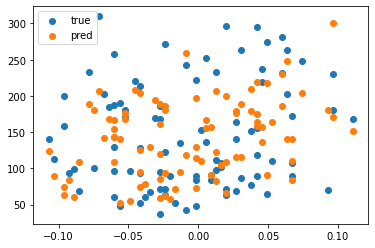

In [220]:
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.legend()
plt.show()

#### (4) 고찰
- 모듈을 불러와 단순히 학습을 시키는 것만 해보았는데 실제 학습을 하는 과정들을 하나하나 뜯어서 실습을 하니 머신러닝 개념에 대한 이해를 하는데 많은 도움이 되었습니다. 